## Tutorial on XGBoost

### Intuitive Description of How XGBoost Works

Imagine you are a teacher trying to help a student improve their test scores. Here's how you might approach it, which parallels how XGBoost works:

1. **Initial Attempt (First Tree)**:
   - You give the student a test (this is like building the first decision tree).
   - You mark the test and see which questions they got wrong (this is like identifying the errors in the model’s predictions).

2. **Learn from Mistakes (Gradient Descent)**:
   - For the questions the student got wrong, you provide extra tutoring focused on those areas (this is like building another tree that focuses on correcting the mistakes of the first tree).

3. **Repeat and Improve (Boosting)**:
   - You give the student another test, including questions similar to the ones they got wrong before (this is adding another tree to correct more mistakes).
   - Again, you see which questions are still wrong and focus even more on those (iteratively adding more trees, each correcting errors from the previous ones).

4. **Combining Knowledge (Ensemble)**:
   - After several rounds of tests and tutoring, the student has improved overall. Each test and tutoring session contributed to their knowledge (this is the ensemble of trees that XGBoost builds).
   - The final score is a combination of all the tests (the combined output of all the trees).

5. **Optimizing Learning (Regularization and Pruning)**:
   - You make sure not to overburden the student with too many details that might confuse them. You focus on the most important areas and remove unnecessary information (this is regularization and pruning to prevent overfitting).

6. **Efficient Learning (Parallel Processing)**:
   - You might have several tutors working with the student at the same time on different aspects of their learning (XGBoost uses parallel processing to speed up training).

### Key Components

1. **Decision Trees**: XGBoost builds an ensemble (a collection) of decision trees.
2. **Gradient Descent**: Each new tree is built to reduce the errors (residuals) of the previous trees using gradient descent.
3. **Boosting**: Trees are added sequentially, each correcting the mistakes of the previous ones.
4. **Regularization**: Techniques are used to avoid overfitting by penalizing complex models.
5. **Parallel Processing**: XGBoost can use multiple cores to speed up the training process.

### Simplified Steps

1. **Start with a simple model** (the first tree).
2. **Identify errors** in the model’s predictions.
3. **Build new models** (trees) that focus on correcting these errors.
4. **Combine all models** to make a final prediction.
5. **Optimize the process** to prevent overfitting and speed up computation.

In essence, XGBoost is like a series of focused study sessions, each aimed at improving on the mistakes of the previous one, ultimately leading to a strong overall performance.

### Explanation

**XGBoost** stands for e**X**treme **G**radient **Boost**ing. It's a powerful machine learning algorithm that has been widely used for both regression and classification tasks. Here’s an intuitive breakdown of how it works:

1. **Boosting**: Think of boosting as a way to combine the strengths of many weak models to create a strong model. In boosting, models are added sequentially, each trying to correct the errors of the previous ones.
2. **Gradient Boosting**: This is a type of boosting where each new model is created to reduce the errors (residuals) of the previous model using gradient descent, an optimization algorithm.
3. **XGBoost**: This is an optimized version of gradient boosting that includes additional features like regularization, parallel processing, and tree pruning, making it more efficient and effective.

### Detailed Explanation

1. **Boosting**:
   - Start with a simple model (e.g., a decision tree).
   - Calculate the error (difference between predicted and actual values).
   - Build a new model that focuses on correcting these errors.
   - Repeat the process, adding models sequentially, each improving on the errors of the previous models.

2. **Gradient Boosting**:
   - Models are added in a sequential manner.
   - Each new model minimizes a loss function, which measures how well the model fits the data.
   - Gradient descent is used to minimize this loss function by adjusting the model parameters.

3. **XGBoost Specifics**:
   - **Regularization**: Adds a penalty to the complexity of the model, which helps prevent overfitting.
   - **Parallel Processing**: Utilizes multiple cores of the CPU to speed up computation.
   - **Tree Pruning**: Removes unnecessary parts of the tree to reduce complexity and improve performance.
   - **Handling Missing Values**: XGBoost can handle missing data internally without needing to impute them.

# XGBoost on Predicting Housing Prices


/home/galen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 26448.065177698023


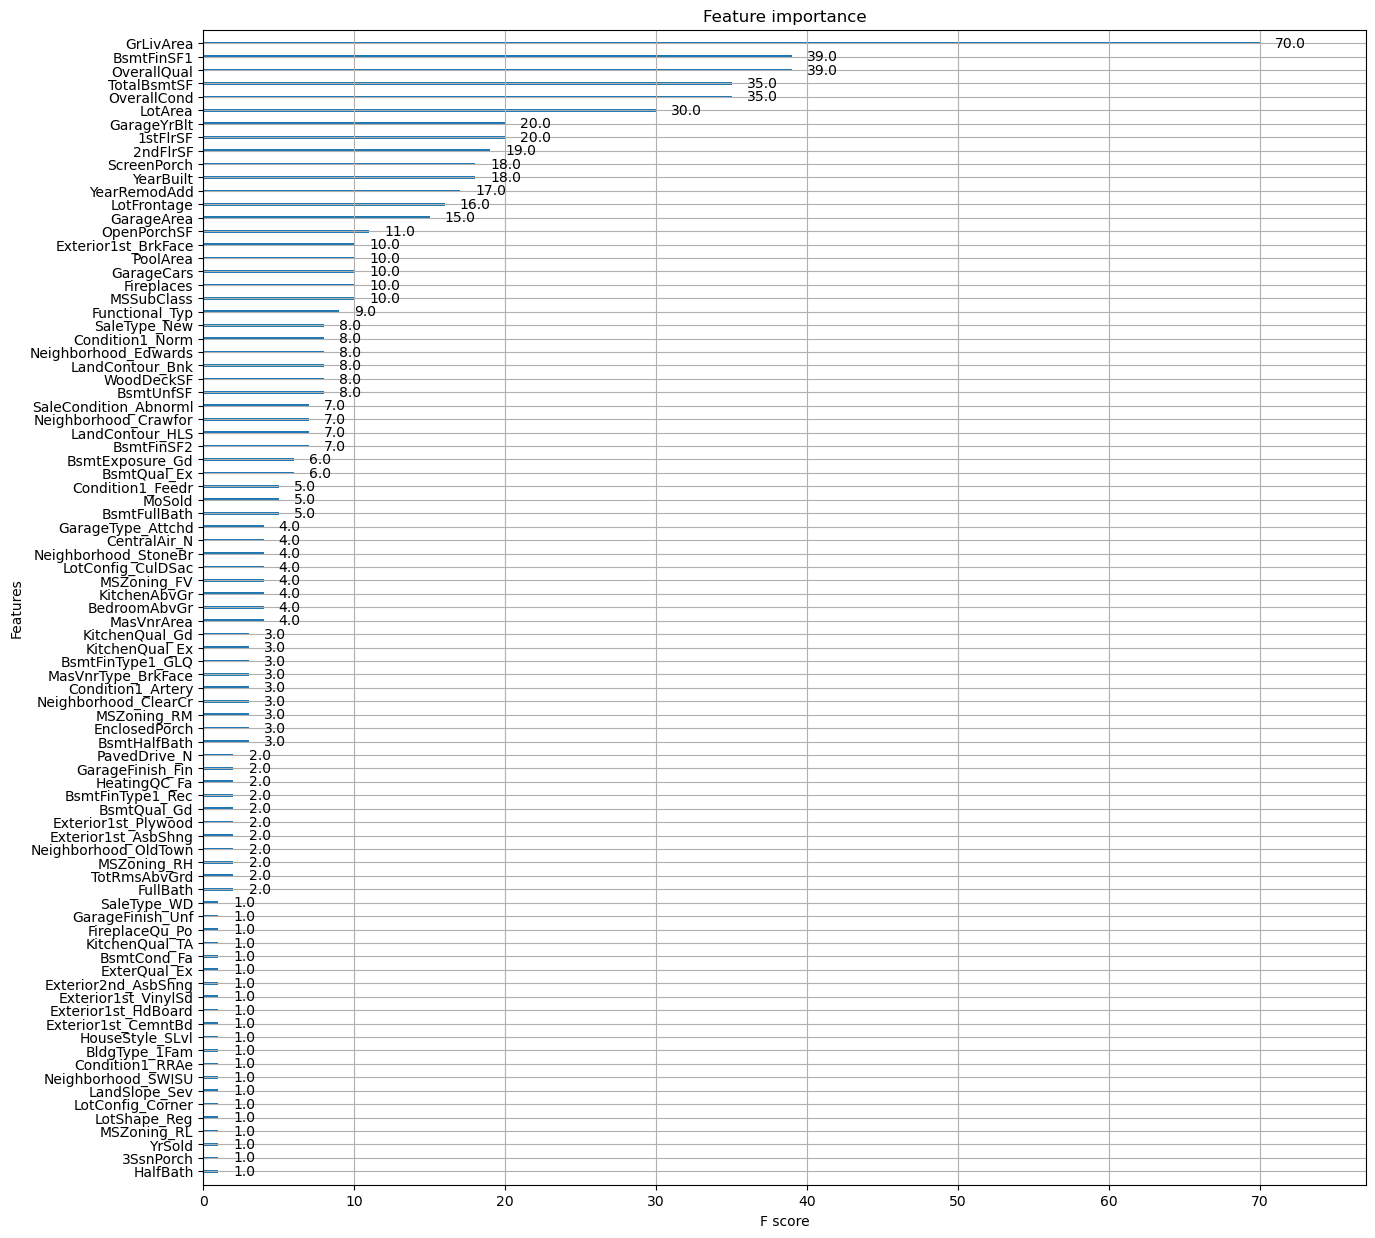

In [1]:
%matplotlib inline

# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

# Convert categorical columns to numerical values using one-hot encoding
train_df = pd.get_dummies(train_df)

# Handle missing values by filling them with the median value of the column
train_df.fillna(train_df.median(), inplace=True)

# Split the data into features (X) and target (y)
X = train_df.drop(['SalePrice', 'Id'], axis=1)
y = train_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the dataset into DMatrix objects
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,  # Maximum depth of a tree
    'eta': 0.1,  # Learning rate
    'objective': 'reg:squarederror',  # Define the objective function
}

# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
preds = bst.predict(dtest)

# Calculate the RMSE
rmse = mean_squared_error(y_test, preds, squared=False)
print(f'RMSE: {rmse}')

# Plot the feature importance
fig, ax = plt.subplots()
fig.set_size_inches([15,15])
xgb.plot_importance(bst, ax = ax)
plt.show()


### Use Case Suitability

**Housing Prices Dataset**:
- **XGBoost** is well-suited for this task because it handles regression problems effectively.
- The dataset features multiple continuous and categorical variables, which XGBoost can handle well.

**Titanic Dataset**:
- **XGBoost** can also be used for classification tasks like predicting survival on the Titanic.
- The dataset includes various features (age, fare, class) that are useful for classification.

In summary, XGBoost is a versatile algorithm that can be used for both regression and classification tasks. It is particularly effective for complex datasets with many features, such as housing prices and the Titanic dataset.

# XGBoost on Titanic Dataset

Accuracy: 0.8212290502793296


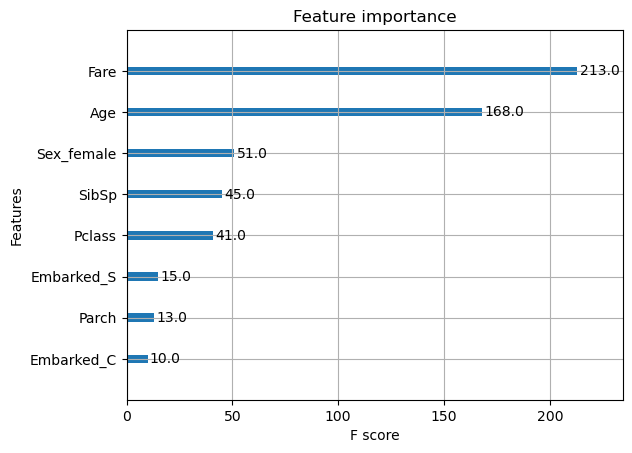

In [2]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
titanic_df = pd.read_csv('./titanic.csv')

# Display the first few rows of the dataset
titanic_df.head()

# Preprocess the dataset
# Drop unnecessary columns
titanic_df = titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Convert categorical columns to numerical values using one-hot encoding
titanic_df = pd.get_dummies(titanic_df)

# Split the data into features (X) and target (y)
X = titanic_df.drop(['Survived', 'PassengerId'], axis=1)
y = titanic_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the dataset into DMatrix objects
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,  # Maximum depth of a tree
    'eta': 0.1,  # Learning rate
    'objective': 'binary:logistic',  # Define the objective function for binary classification
    'eval_metric': 'logloss'  # Evaluation metric
}

# Train the model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions
preds = bst.predict(dtest)
predictions = [1 if pred > 0.5 else 0 for pred in preds]

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Plot the feature importance
xgb.plot_importance(bst)
plt.show()
